In [1]:
import pandas as pd;
import numpy as np

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df = (df-df.mean())/df.std()
df.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [104]:
def compute_cost(X,Y,theta):
    return np.sum(np.power((np.matmul(X,theta)-Y),2))/(2*len(X))

In [105]:
X =df[['TV','Radio','Newspaper']]
X['intercept'] = 1
X = X.reindex(['intercept','TV','Radio','Newspaper'], axis=1)
X = np.array(X)
Y = np.array(df['Sales'])
theta = np.zeros(X.shape[1])

In [106]:
def calculate_gradient_descent(X,Y,learning_rate=0.01,iterations=1000):
    theta = np.zeros(X.shape[1])
    final = pd.DataFrame(columns=['theta','cost'])
    m = len(X)
    for i in range(iterations):
        grad = 1/m * np.matmul(X.T,(np.matmul(X,theta)-Y))
        theta = theta - (learning_rate*grad)
        cost =  compute_cost(X,Y,theta)
        if (i == 0):
            print(cost)
        final.loc[i] = [theta,cost]
    return final
        

In [107]:
val = calculate_gradient_descent(X,Y)

0.4876961511973882


<AxesSubplot:>

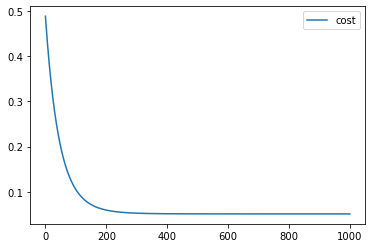

In [101]:
val.plot.line()

In [102]:
val

,theta,cost
0,"[-1.0746958878371515e-17, 0.007783133027372986...",0.487696
1,"[-2.1360690993788014e-17, 0.015484416820036638...",0.478118
2,"[-3.206324095117453e-17, 0.02310473016628843, ...",0.468760
3,"[-4.2499337382650996e-17, 0.030644942191185055...",0.459617
4,"[-5.304645611658998e-17, 0.038105912465627244,...",0.450683
...,...,...
995,"[-1.085975753767344e-15, 0.7530275184009083, 0...",0.051138
996,"[-1.0859868559975902e-15, 0.7530278865846941, ...",0.051138
997,"[-1.0860312649185753e-15, 0.7530282512106891, ...",0.051138
998,"[-1.0859202426161129e-15, 0.7530286123134633, ...",0.051138


In [109]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

#You don't need to specify an object to save the result because 'lr' will take the results of the fitted model.
lr.fit(X, Y)

LinearRegression()

In [115]:
print(lr.intercept_)
print(lr.coef_)

-1.0793649222115991e-15
[ 0.          0.75306591  0.53648155 -0.00433069]
